In [1]:
import pandas as pd # Used for data manipulation and analysis.
import numpy as np # Used for numerical operations and array manipulation.
import matplotlib.pyplot as plt # Used for data visualization, particularly plotting charts and graphs.
import seaborn as sns # based on Matplotlib, used for statistical data visualization
from sklearn.model_selection import train_test_split # A machine learning library for classical machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


/home/connect/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/connect/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/home/connect/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` 

In [2]:
df = pd.read_csv("Datasets/Disease.csv")

In [3]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(4920, 18)

In [5]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

In [6]:
#  creating a list called columns_to_check that includes all columns in your DataFrame df except for the column named 'Disease'.
columns_header = []
for col in df.columns:
    if col != 'Disease':
        columns_header.append(col)
columns_header

['Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

In [7]:
symptoms = df.iloc[ : , 1 : ].values.flatten()
symptoms = list(set(symptoms))
symptoms

[nan,
 ' blister',
 ' shivering',
 ' red_sore_around_nose',
 ' pus_filled_pimples',
 ' unsteadiness',
 ' hip_joint_pain',
 ' skin_peeling',
 ' muscle_wasting',
 ' swollen_extremeties',
 ' cramps',
 ' restlessness',
 ' muscle_pain',
 ' weight_loss',
 ' acidity',
 ' diarrhoea',
 ' pain_in_anal_region',
 ' phlegm',
 ' yellowing_of_eyes',
 ' pain_behind_the_eyes',
 ' irritability',
 ' loss_of_balance',
 ' belly_pain',
 ' congestion',
 ' weakness_in_limbs',
 ' swelling_joints',
 ' sweating',
 ' chills',
 ' swollen_blood_vessels',
 ' brittle_nails',
 ' bladder_discomfort',
 ' yellow_urine',
 ' extra_marital_contacts',
 ' depression',
 ' drying_and_tingling_lips',
 ' nodal_skin_eruptions',
 ' irregular_sugar_level',
 ' altered_sensorium',
 ' swelling_of_stomach',
 ' palpitations',
 ' neck_pain',
 ' continuous_feel_of_urine',
 ' sinus_pressure',
 ' enlarged_thyroid',
 ' ulcers_on_tongue',
 ' nausea',
 ' visual_disturbances',
 ' fluid_overload',
 ' small_dents_in_nails',
 ' burning_micturition'

In [8]:
for symptom in symptoms:
    df[symptom] = df.iloc[:, 1:].apply(lambda row: int(symptom in row.values), axis=1)
df2 = df.drop(columns=columns_header)

In [9]:
df2.head()

,Disease,nan,blister,shivering,red_sore_around_nose,pus_filled_pimples,unsteadiness,hip_joint_pain,skin_peeling,muscle_wasting,...,high_fever,excessive_hunger,rusty_sputum,dischromic _patches,slurred_speech,scurring,receiving_blood_transfusion,indigestion,dehydration,bruising
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df2 = df2.loc[:, df2.columns.notna()]
# This line uses the str.strip() method to remove leading and trailing whitespaces from each column name in the DataFrame
df2.columns = df2.columns.str.strip()


In [11]:
df2.head()

,Disease,blister,shivering,red_sore_around_nose,pus_filled_pimples,unsteadiness,hip_joint_pain,skin_peeling,muscle_wasting,swollen_extremeties,...,high_fever,excessive_hunger,rusty_sputum,dischromic _patches,slurred_speech,scurring,receiving_blood_transfusion,indigestion,dehydration,bruising
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# df2.columns

In [12]:
goal = ['Disease']
le = LabelEncoder()

df2['Disease'] = le.fit_transform(df2['Disease'])

In [13]:
df2

,Disease,blister,shivering,red_sore_around_nose,pus_filled_pimples,unsteadiness,hip_joint_pain,skin_peeling,muscle_wasting,swollen_extremeties,...,high_fever,excessive_hunger,rusty_sputum,dischromic _patches,slurred_speech,scurring,receiving_blood_transfusion,indigestion,dehydration,bruising
0,15,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,15,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,15,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,15,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


4920 150
target ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']
41
['blister', 'shivering', 'red_sore_around_nose', 'pus_filled_pimples', 'unsteadiness', 'hip_joint_pain', 'skin_peeling', 'muscle_wasting', 'swollen_extremeties', 'cramps', 'restlessness', 'muscle_pain', 'weight_loss', 'acidity', 'diarrhoea', 'pain_in_anal_region', 'phlegm', 'yellowing_of_eyes', 'pain_behind_the_eyes', 'irritability', 'loss_of_balance', 'belly_pain', 'congestion', 'weakness_in_limbs', 'swelling_joints', 'sweating', 'chills', 'swollen_blood_vessels', 'brittle_nails', 'bladder_discomfort', 'yellow_urine', 'extra_marital_contacts', 'depression', 'drying_and_tingling_lips', 'nodal_skin_eruptions', 'irregular_sugar_level', 'altered_sensorium', 'swelling_of_stomach', 'palpitations', 'neck_pain', 'continuous_feel_of_urine', '

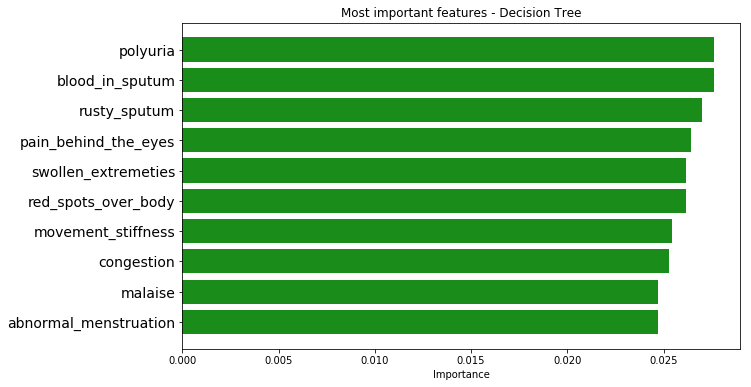

In [14]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

def determine_features_and_goal(df):
    features = df2.drop(columns=['Disease'])
    goal = df2['Disease']
    return features, goal

# Split data into training and testing
def split_data(features, goal, test_size=0.5, random_state=3):
    X_train, X_test, y_train, y_test = train_test_split(features, goal, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test



# Apply KNN classifier
def apply_knn_classifier(K,X_train, X_test, y_train):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    return knn.predict(X_test)

# Apply Naive Bayes classifier
def apply_naive_bayes_classifier(X_train, X_test, y_train):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    return gnb.predict(X_test)

# Apply decision tree classifier
def apply_decision_tree_classifier(X_train, X_test, y_train):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    return dt.predict(X_test),dt

#Apply randomForest classifier
from sklearn.ensemble import RandomForestClassifier
def apply_random_forest_classifier(X_train, X_test, y_train):
 rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
 rm.fit(X_train, y_train)
 rm_prd = rm.predict(X_test)
 return rm,rm_prd

def label_encode_categorical_features(df):
    le = LabelEncoder()
    df = df.apply(le.fit_transform)
    return df


def calculate_performance(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    v=round(metrics.accuracy_score(y_test, y_pred)*100)
    w=round(metrics.precision_score(y_test, y_pred, average='macro')*100)
    z=round(metrics.recall_score(y_test, y_pred, average='macro')*100)
    return v,w,z,cm
if __name__ == '__main__':
    x,y=df.shape
    print(x , y)
    features, goal = determine_features_and_goal(df)
    target=goal.tolist()
    target= [str(i) for i in list(set(goal))] # you can also use unique(target) to get the unique values of the list
    print("target",target)
    print(len(target))

    # F Will contain the features names only
    F=list(features)
    print(F)
    X_train, X_test, y_train, y_test = split_data(features, goal, test_size=0.3, random_state=3)
    X_train = label_encode_categorical_features(X_train)
    X_test = label_encode_categorical_features(X_test)

    print(len(X_train))
    print(len(X_test))
    # K = round(np.sqrt(x)): You calculate the square root of the number of samples (x), rounding it to the nearest integer. The square root is commonly used as a heuristic for determining the number of neighbors in KNN.
    K=round(np.sqrt(x))
    y_pred_knn = apply_knn_classifier(K,X_train, X_test, y_train)

    # Step3.1 : Calculate the performance of first classifier  "KNN" and print results
    A_res,P_res,R_res,con=calculate_performance(y_test,y_pred_knn)
    print("KNN report\n",classification_report(y_test, y_pred_knn, target_names=target))
    print("\n KNN Accuracy:",A_res,'%')
    print("KNN Precision:",P_res,'%')
    print("KNN Recall:",R_res,'%')
    print("KNN Confusion Matrix:\n",con)

    # Step 4:  Apply second classifier  "Naive Bayes"
    y_pred_nb = apply_naive_bayes_classifier(X_train, X_test, y_train)

    # Step 4.1: Calculate the performance of second classifier  "Naive Bayes" and print results
    A_res,P_res,R_res,con=calculate_performance(y_test, y_pred_nb)
    # summarizes various classification metrics, including precision, recall, F1-score, and support, for each class and their average.

    print("Naive report\n",classification_report(y_test, y_pred_nb, target_names=target))
    print("\n NaiveBayesAccuracy: ",A_res,'%')
    print("NaiveBayes Precision:",P_res,'%')
    print("NaiveBayes Recall:",R_res,'%')
    print("Naive Confusion Matrix:\n",con)
    # Step 5: Apply the third classifier  "Decision tree"
    y_pred_dt,dt = apply_decision_tree_classifier(X_train, X_test, y_train)

    # Step 5.1: Calculate the performance of the third classifier  "Decision tree" and print results
    A_res,P_res,R_res,con=calculate_performance(y_test, y_pred_dt)
    print("DT report\n",classification_report(y_test, y_pred_dt, target_names=target))
    print("\n Decision Tree Accuracy: ",A_res,'%')
    print("Decision Tree Precision:",P_res,'%')
    print("Decision Tree Recall:",R_res,'%')
    print("DT Confusion Matrix:\n",con)

    # Use this code to draw the decision tree and save it in tree.png
    from sklearn import tree
    import graphviz
    dot_data = tree.export_graphviz(dt, feature_names=F, class_names=target, filled=True, rounded=True, special_characters=True,out_file=None,)
    graph = graphviz.Source(dot_data)
    # # Create a graph from the DOT data and render it directly as PNG
    graph.format = "png"
    graph.render("Tree")
# Extracts the column names (feature names) from the training set.
feature_names = X_train.columns
# Retrieves the feature importances calculated by the Decision Tree classifier
feature_imports = dt.feature_importances_
# Creates a DataFrame containing the top 10 features sorted by importance.
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
# Bar Plot Visualization
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.9,color="green")
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

In [15]:
doc_vs_dis =pd.read_csv("Datasets/DoctorAndDisease.csv",encoding='latin1', names=['Disease','Specialist'])
doc_vs_dis=doc_vs_dis.replace([np.inf, -np.inf], np.nan).dropna()

In [16]:
doc_vs_dis

,Disease,Specialist
0,Drug Reaction,Allergist
1,Allergy,Allergist
2,Hypertension,Cardiologist
3,Heart attack,Cardiologist
4,Psoriasis,Dermatologist
5,Chicken pox,Dermatologist
6,Acne,Dermatologist
7,Impetigo,Dermatologist
8,Fungal infection,Dermatologist
9,Hypothyroidism,Endocrinologist


In [17]:
doc_vs_dis['Specialist'] = np.where((doc_vs_dis['Disease'] == 'Tuberculosis'),'Pulmonologist', doc_vs_dis['Specialist'])

In [18]:
doc_vs_dis


,Disease,Specialist
0,Drug Reaction,Allergist
1,Allergy,Allergist
2,Hypertension,Cardiologist
3,Heart attack,Cardiologist
4,Psoriasis,Dermatologist
5,Chicken pox,Dermatologist
6,Acne,Dermatologist
7,Impetigo,Dermatologist
8,Fungal infection,Dermatologist
9,Hypothyroidism,Endocrinologist


In [19]:
des_data = pd.read_csv("Datasets/DescriptionOfDisease.csv")
des_data.dropna(inplace=True)
# des_data=des_data.replace([np.inf, -np.inf], np.nan).dropna()

In [20]:
des_data

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...
5,GERD,"Gastroesophageal reflux disease, or GERD, is a..."
6,Chronic cholestasis,"Chronic cholestatic diseases, whether occurrin..."
7,hepatitis A,Hepatitis A is a highly contagious liver infec...
8,Osteoarthristis,Osteoarthritis is the most common form of arth...
9,(vertigo) Paroymsal Positional Vertigo,Benign paroxysmal positional vertigo (BPPV) is...


In [ ]:
df2

In [22]:
test_col = []
test_data = {}
for col in df2.columns:
    if col != 'Disease':
        test_col.append(col)


symptoms = []
predicted = []
def test_input():
    symptoms.clear()
    predicted.clear()
    num_inputs = int(input("Enter the number of symptoms you have: "))
    for i in range(num_inputs):
        user_input = input("Enter Symptoms #{}: ".format(i+1))
        symptoms.append(user_input)
    print("Symptoms you have:", symptoms)
    test_data = {}
    for column in test_col:
        test_data[column] = 1 if column in symptoms else 0
    test_data = {k: int(v) for k, v in test_data.items()}
    test_df = pd.DataFrame(test_data, index=[0], dtype=float)
#     print(test_df)
    print("Predicting Disease based on 4 algorithms...")


    knn_pred = apply_knn_classifier(1,X_train, test_df, y_train)
    knn_pred = le.inverse_transform(knn_pred)
    print(f'KNN predict {knn_pred}')
    predicted.extend(knn_pred)

    naive_pred = apply_naive_bayes_classifier(X_train, test_df, y_train)
    naive_pred = le.inverse_transform(naive_pred)
    print(f'Naive predict {naive_pred}')
    predicted.extend(naive_pred)


    y_pred_dt , dt = apply_decision_tree_classifier(X_train, test_df, y_train)
    y_pred_dt = le.inverse_transform(y_pred_dt)
    print(f'Decision_Tree {y_pred_dt}')
    predicted.extend(y_pred_dt)

    
    
    rft , random_forest_tree = apply_random_forest_classifier(X_train, test_df, y_train)
    random_forest_tree = le.inverse_transform(random_forest_tree)
    print(f'random_forest_tree {random_forest_tree}')
    predicted.extend(random_forest_tree)
    
#     for i in len(predicted):
    print(predicted)
    for i in des_data['Disease']:
        if i == 'Hypertension':
            print(i)
        
        
        
        

    disease_counts = Counter(predicted)
    percentage_per_disease = {disease: (count / 4) * 100 for disease, count in disease_counts.items()}
    result_df = pd.DataFrame({"Disease": list(percentage_per_disease.keys()),
                               "Chances": list(percentage_per_disease.values())})

    result_df = result_df.merge(doc_vs_dis, on='Disease', how='left' , suffixes=('_Specialist', '_doc_vs_dis'))
    des_data.dropna(subset=['Description'], inplace=True)
    
    result_df = result_df.merge(des_data, on='Disease', how='left', suffixes=('_Description', '_des_data'))
#     result_df.fillna({'Specialist': 'There is No Specialist', 'Description': 'There is No Description'}, inplace=True)


    return result_df

test_input()

Enter the number of symptoms you have:  3
Enter Symptoms #1:  weight_loss
Enter Symptoms #2:  yellowiny_of_eyes
Enter Symptoms #3:  dizziness


Symptoms you have: ['weight_loss', 'yellowiny_of_eyes', 'dizziness']
Predicting Disease based on 4 algorithms...
KNN predict ['Hypertension ']
Naive predict ['Hypertension ']
Decision_Tree ['Jaundice']
random_forest_tree ['Cervical spondylosis']
['Hypertension ', 'Hypertension ', 'Jaundice', 'Cervical spondylosis']
Hypertension


,Disease,Chances,Specialist,Description
0,Hypertension,50.0,Cardiologist,NaN
1,Jaundice,25.0,Gastroenterologist,Yellow staining of the skin and sclerae (the w...
2,Cervical spondylosis,25.0,Neurologist,Cervical spondylosis is a general term for age...
